In [2]:
%run -i "makeStatistics.py"

---------------[FINISHED]---------------


In [3]:
# ans[['Node ID', 'Centralidade', 'Residual Energy']]

import os
import subprocess

if dir == "Infocom5":
    ansInfocom5 = ans
    runCmd = subprocess.check_output("sed -i 's/dir = \"Infocom5\"/dir = \"Sassy\"/g' makeStatistics.py", shell=True);
else:
    ansSassy = ans
    runCmd = subprocess.check_output("sed -i 's/dir = \"Sassy\"/dir = \"Infocom5\"/g' makeStatistics.py", shell=True);
    
## roda de novo pra pegar o valor para o segundo trace
%run -i "makeStatistics.py"
if dir == "Infocom5":
    ansInfocom5 = ans
else:
    ansSassy = ans

heatmap1_sassy = pandas.pivot_table(ansSassy, values='Residual Energy', 
                     index=['Node ID'], 
                     columns='Centralidade')
heatmap1_infocom5 = pandas.pivot_table(ansInfocom5, values='Residual Energy', 
                     index=['Node ID'], 
                     columns='Centralidade')

# ans.corr()
# ans

---------------[FINISHED]---------------


In [4]:
# forca execucao no Rollernet
if dir == "Infocom5":
    runCmd = subprocess.check_output("sed -i 's/dir = \"Infocom5\"/dir = \"Rollernet\"/g' makeStatistics.py", shell=True);
else:
    runCmd = subprocess.check_output("sed -i 's/dir = \"Sassy\"/dir = \"Rollernet\"/g' makeStatistics.py", shell=True);
    
## roda de novo pra pegar o valor para o Rollernet
%run -i "makeStatistics.py"
ansRollernet = ans
    
## retira o forcado do Rollernet
runCmd = subprocess.check_output("sed -i 's/dir = \"Rollernet\"/dir = \"Sassy\"/g' makeStatistics.py", shell=True);

---------------[FINISHED]---------------


In [5]:
## dropa coluna do nodeID
ansInfocom5.drop("Node ID", axis=1, inplace=True)
ansSassy.drop("Node ID", axis=1, inplace=True)
ansRollernet.drop("Node ID", axis=1, inplace=True)

# tempo medio de contato tem uma relevancia baixa
#ansRollernet.drop("Mean Contact Time", axis=1, inplace=True)
#ansSassy.drop("Mean Contact Time", axis=1, inplace=True)
#ansInfocom5.drop("Mean Contact Time", axis=1, inplace=True)

ansInfocom5.to_csv("WiMob/Infocom5_brutos.csv", header=True)
ansSassy.to_csv("WiMob/Sassy_brutos.csv", header=True)
ansRollernet.to_csv("WiMob/Rollernet_brutos.csv", header=True)

In [6]:
ansInfocom5.corr()

,Centralidade,LCC,Betweenness,Contacts Qty,Mean Contact Time,Residual Energy
Centralidade,1.000000,-0.427656,0.404367,0.733295,-0.157873,-0.115487
LCC,-0.427656,1.000000,-0.995944,-0.515629,0.061693,-0.006373
Betweenness,0.404367,-0.995944,1.000000,0.480690,-0.085546,0.026140
Contacts Qty,0.733295,-0.515629,0.480690,1.000000,-0.139805,-0.123788
Mean Contact Time,-0.157873,0.061693,-0.085546,-0.139805,1.000000,-0.020719
Residual Energy,-0.115487,-0.006373,0.026140,-0.123788,-0.020719,1.000000


In [7]:
ansSassy.corr()

,Centralidade,LCC,Betweenness,Contacts Qty,Mean Contact Time,Residual Energy
Centralidade,1.000000,0.048358,0.648890,0.371905,0.193383,0.074468
LCC,0.048358,1.000000,-0.322285,-0.072585,0.234478,-0.282410
Betweenness,0.648890,-0.322285,1.000000,0.528873,-0.193561,0.174606
Contacts Qty,0.371905,-0.072585,0.528873,1.000000,-0.308992,0.112749
Mean Contact Time,0.193383,0.234478,-0.193561,-0.308992,1.000000,-0.089166
Residual Energy,0.074468,-0.282410,0.174606,0.112749,-0.089166,1.000000


In [8]:
ansRollernet.corr()

,Centralidade,LCC,Betweenness,Contacts Qty,Mean Contact Time,Residual Energy
Centralidade,1.000000,-0.727179,0.763739,0.508189,0.035148,0.145286
LCC,-0.727179,1.000000,-0.996779,-0.529855,0.101838,0.058588
Betweenness,0.763739,-0.996779,1.000000,0.533950,-0.082477,-0.036465
Contacts Qty,0.508189,-0.529855,0.533950,1.000000,-0.603928,0.003353
Mean Contact Time,0.035148,0.101838,-0.082477,-0.603928,1.000000,0.068869
Residual Energy,0.145286,0.058588,-0.036465,0.003353,0.068869,1.000000


In [9]:
import matplotlib.pyplot
import seaborn
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(ansInfocom5['Centralidade'],ansInfocom5['Residual Energy'])
line = slope*ansInfocom5['Centralidade']+intercept

# matplotlib.pyplot.plot('Centralidade', 'Residual Energy', data=ansInfocom5, marker='o', alpha=0.4, line)
# matplotlib.pyplot.plot(ansInfocom5['Centralidade'],ansInfocom5['Residual Energy'],'o', ansInfocom5['Centralidade'], line)
seaborn.regplot(x="Centralidade", y="Residual Energy", data=ansInfocom5, ci=95)
matplotlib.pyplot.xlabel('Centrality')

#matplotlib.pyplot.savefig('Infocom5_centralidade_x_residualEnergy.pdf')

Text(0.5,0,'Centrality')

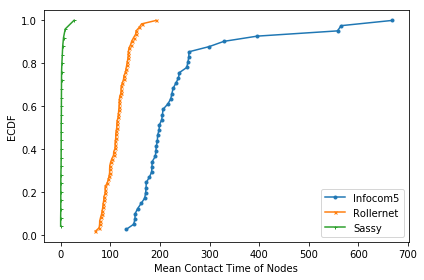

In [10]:
from statsmodels.distributions.empirical_distribution import ECDF

#seaborn.distplot(ansInfocom5['Mean Contact Time'], kde=True)
cdf = ECDF(ansInfocom5['Mean Contact Time'])
matplotlib.pyplot.plot(cdf.x, cdf.y, label="Infocom5", marker="o", markersize=3)
cdf = ECDF(ansRollernet['Mean Contact Time'])
matplotlib.pyplot.plot(cdf.x, cdf.y, label="Rollernet", marker="x", markersize=3)
cdf = ECDF(ansSassy['Mean Contact Time'])
matplotlib.pyplot.plot(cdf.x, cdf.y, label="Sassy", marker="+", markersize=3)

matplotlib.pyplot.legend()

matplotlib.pyplot.ylabel('ECDF')
matplotlib.pyplot.xlabel('Mean Contact Time of Nodes')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.savefig('WiMob/ecdf_mean_contact_time.pdf')

In [14]:
print ansRollernet.sum()

Centralidade            724.400000
LCC                      61.066007
Betweenness              31.000000
Contacts Qty         120292.000000
Mean Contact Time      7065.198722
Residual Energy       22675.234000
dtype: float64


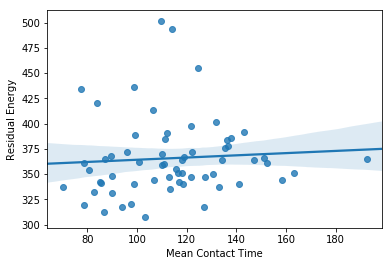

In [28]:
slope, intercept, r_value, p_value, std_err = stats.linregress(ansRollernet['Mean Contact Time'],ansRollernet['Residual Energy'])
line = slope*ansRollernet['Mean Contact Time']+intercept

# matplotlib.pyplot.plot('Centralidade', 'Residual Energy', data=ansInfocom5, marker='o', alpha=0.4, line)
# matplotlib.pyplot.plot(ansInfocom5['Centralidade'],ansInfocom5['Residual Energy'],'o', ansInfocom5['Centralidade'], line)
seaborn.regplot(x="Mean Contact Time", y="Residual Energy", data=ansRollernet, ci=95)

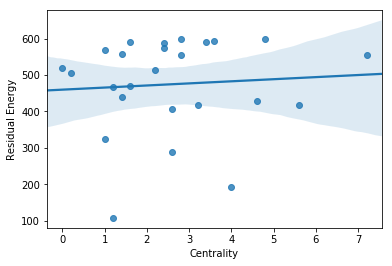

In [328]:
slope, intercept, r_value, p_value, std_err = stats.linregress(ansSassy['Centralidade'],ansSassy['Residual Energy'])
line = slope*ansSassy['Centralidade']+intercept

# matplotlib.pyplot.plot('Centralidade', 'Residual Energy', data=ansInfocom5, marker='o', alpha=0.4, line)
# matplotlib.pyplot.plot(ansSassy['Centralidade'],ansSassy['Residual Energy'],'o', ansSassy['Centralidade'], line)
seaborn.regplot(x="Centralidade", y="Residual Energy", data=ansSassy, ci=95)
matplotlib.pyplot.xlabel('Centrality')

#matplotlib.pyplot.savefig('Sassy_centralidade_x_residualEnergy.pdf')

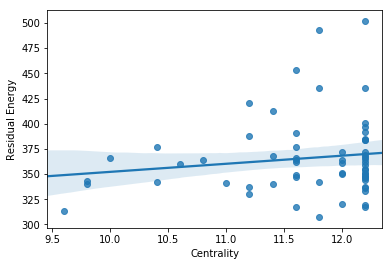

In [330]:
slope, intercept, r_value, p_value, std_err = stats.linregress(ansRollernet['Centralidade'],ansRollernet['Residual Energy'])
line = slope*ansRollernet['Centralidade']+intercept

# matplotlib.pyplot.plot('Centralidade', 'Residual Energy', data=ansInfocom5, marker='o', alpha=0.4, line)
# matplotlib.pyplot.plot(ansSassy['Centralidade'],ansSassy['Residual Energy'],'o', ansSassy['Centralidade'], line)
seaborn.regplot(x="Centralidade", y="Residual Energy", data=ansRollernet, ci=95)
matplotlib.pyplot.xlabel('Centrality')

#matplotlib.pyplot.savefig('Rollernet_centralidade_x_residualEnergy.pdf')

In [29]:
ansInfocom5.rename(columns={'Centralidade':'Centrality'}, 
                 inplace=True)
ansSassy.rename(columns={'Centralidade':'Centrality'}, 
                 inplace=True)
ansRollernet.rename(columns={'Centralidade':'Centrality'}, 
                 inplace=True)

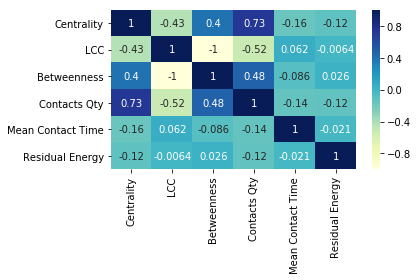

In [30]:
import seaborn
import matplotlib.pylab

# paleta = seaborn.palplot(seaborn.dark_palette("purple", reverse=True))

# seaborn.heatmap(heatmap1_data, cmap="YlGnBu")
# seaborn.heatmap(heatmap1_data, cmap=paleta)
seaborn.heatmap(ansInfocom5.corr(), cmap="YlGnBu", annot=True)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.savefig('Infocom5_corr_heatmap.pdf')
matplotlib.pylab.show()

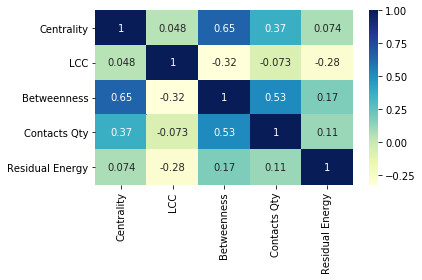

In [345]:
seaborn.heatmap(ansSassy.corr(), cmap="YlGnBu", annot=True)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.savefig('Sassy_corr_heatmap.pdf')
matplotlib.pylab.show()

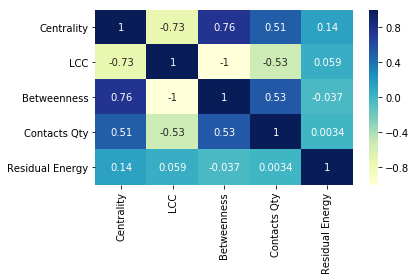

In [346]:
seaborn.heatmap(ansRollernet.corr(), cmap="YlGnBu", annot=True)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.savefig('Rollernet_corr_heatmap.pdf')
matplotlib.pylab.show()

/home/diogosoaresm/anaconda2/envs/makeStatistics/lib/python2.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


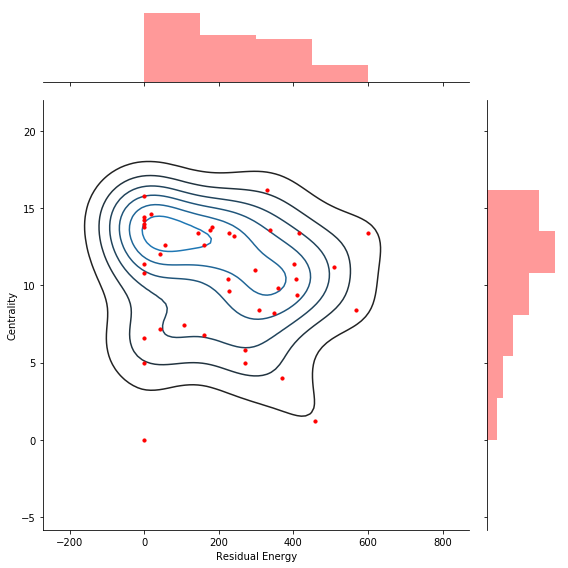

In [359]:
#seaborn.jointplot('Residual Energy', 'Centralidade',ansInfocom5,color="red",kind='kde', size=8)
#seaborn.set_style("white")
#seaborn.kdeplot(heatmap1_data['Centralidade'],heatmap1_data['Node ID'], cmap="inferno_r", shade=True, shade_lowest=True, )
#matplotlib.pylab.show()

(seaborn.jointplot('Residual Energy', 
                   'Centrality',
                   ansInfocom5,color="red", 
                   #kind='kde', 
                   s=10,
                   annot_kws=dict(stat="r"),
                   size=8).plot_joint(seaborn.kdeplot, zorder=0, n_levels=6))

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.savefig('Infocom5_kernel_density.pdf')

/home/diogosoaresm/anaconda2/envs/makeStatistics/lib/python2.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


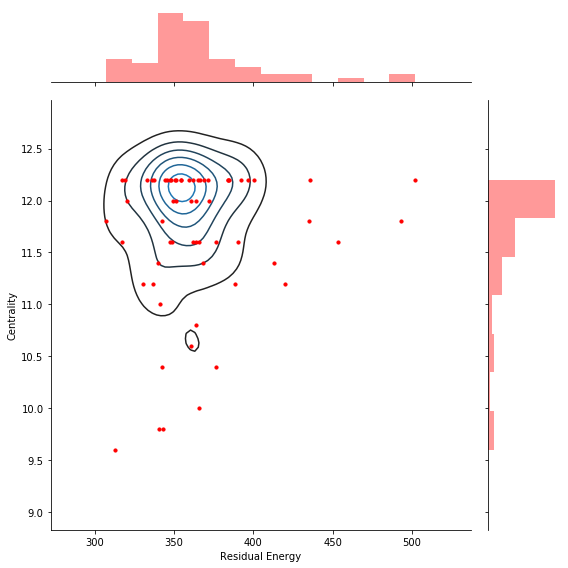

In [360]:
#seaborn.jointplot('Residual Energy', 'Centralidade',ansRollernet,color="red",kind='kde', size=8)
(seaborn.jointplot('Residual Energy', 
                   'Centrality',
                   ansRollernet,color="red", 
                   #kind='kde', 
                   s=10,
                   annot_kws=dict(stat="r"),
                   size=8).plot_joint(seaborn.kdeplot, zorder=0, n_levels=6))

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.savefig('Rollernet_kernel_density.pdf')

/home/diogosoaresm/anaconda2/envs/makeStatistics/lib/python2.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


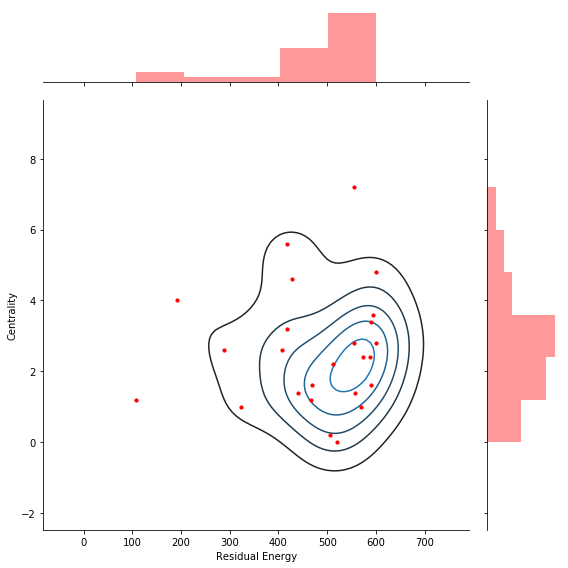

In [361]:
#seaborn.jointplot('Residual Energy', 'Centralidade',ansSassy,color="red",kind='kde', size=8)
(seaborn.jointplot('Residual Energy', 
                   'Centrality',
                   ansSassy,color="red", 
                   #kind='kde', 
                   s=10,
                   annot_kws=dict(stat="r"),
                   size=8).plot_joint(seaborn.kdeplot, zorder=0, n_levels=6))

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.savefig('Sassy_kernel_density.pdf')

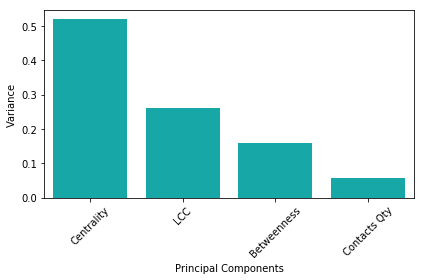

In [369]:
## MUDE AQUI PRA UTILIZAR O TRACE DETERMINADO!!!1
tracePCA = ansSassy

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
features = ['Centrality', 'LCC', 'Betweenness', 'Contacts Qty']

# Separating out the features
x = tracePCA.loc[:, features].values

# Separating out the target
y = tracePCA.loc[:,['Residual Energy']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = decomposition.PCA(n_components=4)

principalComponents = pca.fit_transform(x)

## transformo na minha componente principal
pc_df = pandas.DataFrame(data = x , 
        columns = ['Centrality', 'LCC','Betweenness','Contacts Qty'])
pc_df['Cluster'] = y
pc_df.head()

## pca.explained_variance_ratio_
df = pandas.DataFrame({'Variance':pca.explained_variance_ratio_,
             'Principal Components':['Centrality', 'LCC','Betweenness','Contacts Qty']})

matplotlib.pyplot.xticks(rotation=45)
seaborn.barplot(x='Principal Components',y="Variance", 
           data=df, color="c")

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.savefig('Sassy_pca_variance.pdf')

Text(0,0.5,'LCC')

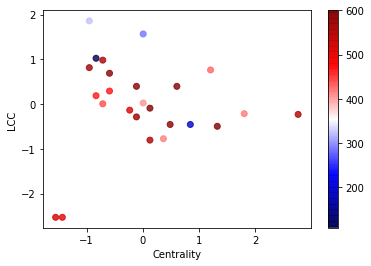

In [371]:
'''
seaborn.lmplot( x="Centralidade", y="LCC",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size
'''
matplotlib.pyplot.scatter(x=pc_df['Centrality'], 
                          y=pc_df['LCC'], 
                          c = pc_df['Cluster'], 
                          alpha = 0.8, 
                          cmap = 'seismic')

cbar = matplotlib.pyplot.colorbar()
matplotlib.pyplot.xlabel('Centrality')
matplotlib.pyplot.ylabel('LCC')